In [174]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import cufflinks as cf
from sklearn.decomposition import PCA
from pycaret.clustering import *
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [149]:
df = pd.read_csv("jobs.csv")
print(df.shape)
df.head()

(2682, 22)


,Unnamed: 0,Created_date,Due_date,Job_id,Payment_type,Budget,Job_title,Category,Subcategory,Job_description,...,Link_of_employer,Employer_id,No_of_quotes,Link_of_quoters,No_of_Premium_quotes,Link_of_premium_quoters,No_of_inviited,Link_of_invited_freelancers,No_of_Hired,Link_of_hired_freelancers
0,0,"December 04, 2020","January 02, 2021",1737898,Fixed Price,[' $5k-$10k'],"Looking for ""NetSuite"" Part-Time Trainer",Education & Training,Information Technology,"Currently, we are Looking for ""Oracle Netsuite...",...,https://www.guru.com/work/detail/1737898,1737898,0,[],0,[],14,['https://www.guru.com/freelancers/netsuite-fr...,0,[]
1,1,"December 04, 2020","December 11, 2020",1737897,Fixed Price,[' Under $250'],developing app for language translator,Programming & Development,Web Development & Design,Need an app to convert a youtube script from o...,...,https://www.guru.com/work/detail/1737897,1737897,0,[],0,[],0,[],0,[]
2,2,"December 04, 2020","January 02, 2021",1737894,Fixed Price or Hourly,[],React Js Developers Needed,Programming & Development,Web Development & Design,"Hi,\nI need 2 React js developers having atlea...",...,https://www.guru.com/work/detail/1737894,1737894,20,['https://www.guru.com/freelancers/yao-tingche...,1,['https://www.guru.com/freelancers/yao-tingchen'],0,[],0,[]
3,3,"December 04, 2020","January 02, 2021",1737895,Fixed Price,[' Under $250'],I have minimal issues with my website,Programming & Development,Web Development & Design,"Hello there, \n\nIt's vue larvel website, it's...",...,https://www.guru.com/work/detail/1737895,1737895,13,['https://www.guru.com/freelancers/amazon-soft...,0,[],3,['https://www.guru.com/freelancers/ahmed-s-hel...,0,[]
4,4,"December 04, 2020","January 02, 2021",1737892,Fixed Price,[' $500-$1k'],Wordpress Site Customization,Programming & Development,Web Development & Design,PLEASE DO NOT RESPOND TO THIS PROJECT WITH A C...,...,https://www.guru.com/work/detail/1737892,1737892,13,['https://www.guru.com/freelancers/amazon-soft...,0,[],0,[],0,[]


### Goal

✔ Category

✔ Payment/Budget - Will be a derived one and will need to use imputation as well. - KNN Imputer

In [150]:
df2 = df[['Budget', 'Category']]
df2.head()

,Budget,Category
0,[' $5k-$10k'],Education & Training
1,[' Under $250'],Programming & Development
2,[],Programming & Development
3,[' Under $250'],Programming & Development
4,[' $500-$1k'],Programming & Development


In [151]:
df2.shape

(2682, 2)

In [152]:
s = np.round(np.random.default_rng().uniform(250,10000,2682)).astype(int)
s

array([7850, 2475, 5558, ..., 2529, 8529, 7686])

In [153]:
temp = {'Budget': pd.Series(s),
         'Category': df['Category']}

new_df = pd.DataFrame(temp)
new_df

,Budget,Category
0,7850,Education & Training
1,2475,Programming & Development
2,5558,Programming & Development
3,537,Programming & Development
4,3073,Programming & Development
...,...,...
2677,4199,Other
2678,9841,Sales & Marketing
2679,2529,Writing & Translation
2680,8529,Other


In [154]:
print(type(new_df['Budget'].iloc[0]))
print(type(new_df['Category'].iloc[0]))

<class 'numpy.int32'>
<class 'str'>


In [155]:
#instantiate both packages to use
encoder = OrdinalEncoder()

# create a list of categorical columns to iterate over
cat_cols = ['Category']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(new_df[columns])

In [156]:
new_df

,Budget,Category
0,7850,3.0
1,2475,7.0
2,5558,7.0
3,537,7.0
4,3073,7.0
...,...,...
2677,4199,6.0
2678,9841,8.0
2679,2529,9.0
2680,8529,6.0


In [157]:
df_scaled = StandardScaler().fit_transform(new_df)
normalized_df = pd.DataFrame(df_scaled)

In [158]:
round(silhouette_score(normalized_df, KMeans(n_clusters = 4).fit_predict(normalized_df)), 2)

0.52

In [159]:
KMeans= KMeans(4)
KMeans.fit(normalized_df)
labels=KMeans.labels_

In [160]:
clusters=pd.concat([new_df, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()

,Budget,Category,cluster
0,7850,3.0,3
1,2475,7.0,1
2,5558,7.0,2
3,537,7.0,1
4,3073,7.0,1


In [161]:
clusters.columns

Index(['Budget', 'Category', 'cluster'], dtype='object')

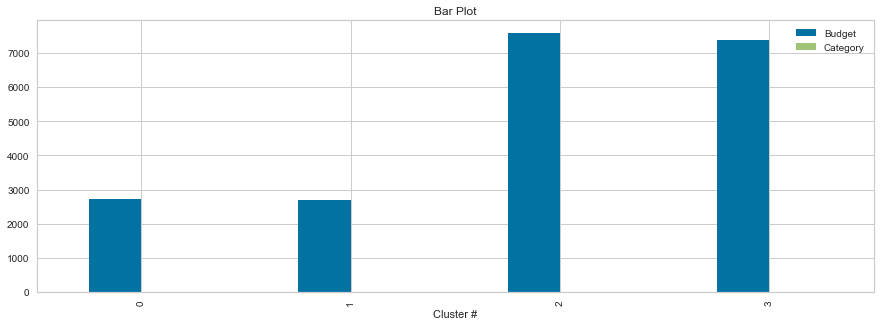

In [162]:
(clusters[['Budget', 'Category', 'cluster']].groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Bar Plot')
plt.xlabel('Cluster #');

In [163]:
pca= PCA(n_components= 2)

pca.fit(normalized_df)
pca_features=pca.transform(normalized_df)

print(pca_features.shape)

pca_df = pd.DataFrame(data=pca_features,columns=['pca1','pca2'])

fin_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)

(2682, 2)


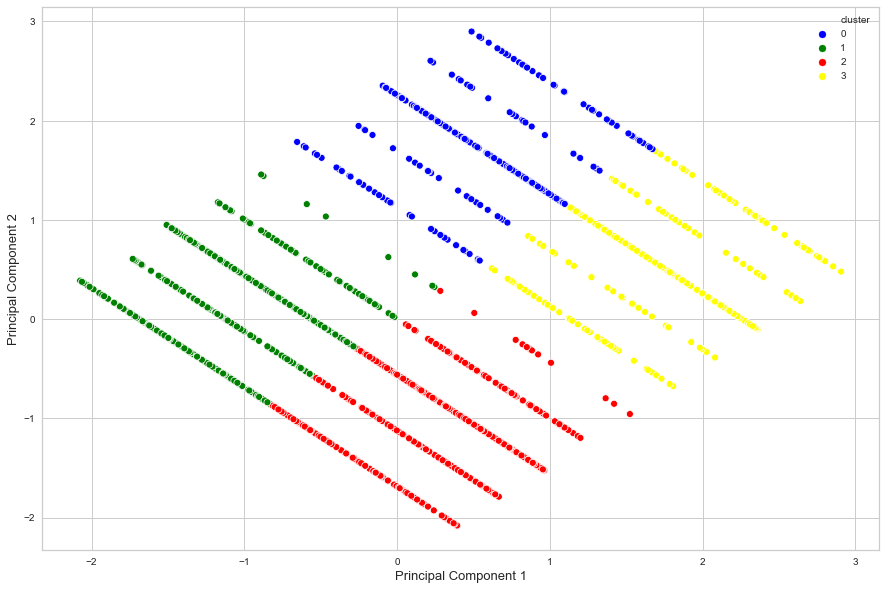

In [164]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=fin_df, palette=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Principal Component 1', fontsize=13)
plt.ylabel('Principal Component 2', fontsize=13)
plt.show()

### Converting budget to string

In [165]:
df3 = new_df
df3

,Budget,Category
0,7850,3.0
1,2475,7.0
2,5558,7.0
3,537,7.0
4,3073,7.0
...,...,...
2677,4199,6.0
2678,9841,8.0
2679,2529,9.0
2680,8529,6.0


In [166]:
df3['Budget'].astype(str)

0       7850
1       2475
2       5558
3        537
4       3073
        ... 
2677    4199
2678    9841
2679    2529
2680    8529
2681    7686
Name: Budget, Length: 2682, dtype: object

In [167]:
new_budget = [str(i) for i in df3['Budget']]

In [168]:
print(type(new_budget[0]))

<class 'str'>


In [169]:
fin = {'Budget': pd.Series(new_budget),
      'Category': df['Category']}

df4 = pd.DataFrame(fin)
df4

,Budget,Category
0,7850,Education & Training
1,2475,Programming & Development
2,5558,Programming & Development
3,537,Programming & Development
4,3073,Programming & Development
...,...,...
2677,4199,Other
2678,9841,Sales & Marketing
2679,2529,Writing & Translation
2680,8529,Other


In [170]:
#instantiate both packages to use
encoder = OrdinalEncoder()

# create a list of categorical columns to iterate over
cat_cols = ['Budget', 'Category']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df4[columns])

In [171]:
df4

,Budget,Category
0,1785.0,3.0
1,363.0,7.0
2,1189.0,7.0
3,1130.0,7.0
4,519.0,7.0
...,...,...
2677,806.0,6.0
2678,2287.0,8.0
2679,375.0,9.0
2680,1964.0,6.0


In [172]:
df_scaled = StandardScaler().fit_transform(df4)
normalized_df = pd.DataFrame(df_scaled)

In [175]:
round(silhouette_score(normalized_df, KMeans(n_clusters = 4).fit_predict(normalized_df)), 2)

0.52

In [176]:
KMeans= KMeans(4)
KMeans.fit(normalized_df)
labels=KMeans.labels_

In [177]:
clusters2=pd.concat([df4, pd.DataFrame({'cluster': labels})], axis=1)
clusters2.head()

,Budget,Category,cluster
0,1785.0,3.0,1
1,363.0,7.0,3
2,1189.0,7.0,0
3,1130.0,7.0,3
4,519.0,7.0,3


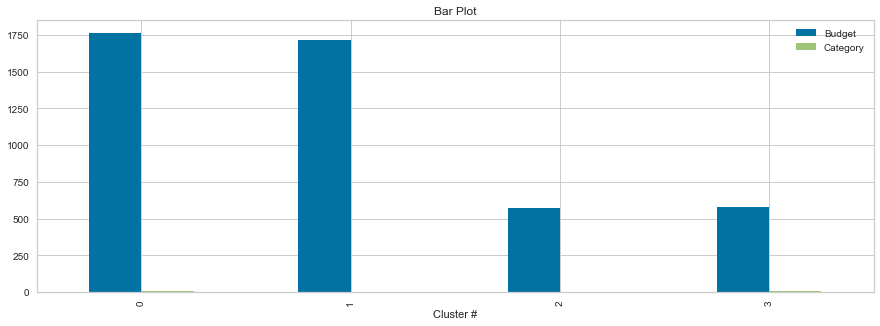

In [178]:
(clusters2[['Budget', 'Category', 'cluster']].groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Bar Plot')
plt.xlabel('Cluster #');

In [179]:
pca= PCA(n_components= 2)

pca.fit(normalized_df)
pca_features=pca.transform(normalized_df)

print(pca_features.shape)

pca_df = pd.DataFrame(data=pca_features,columns=['pca1','pca2'])

fin_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)

(2682, 2)


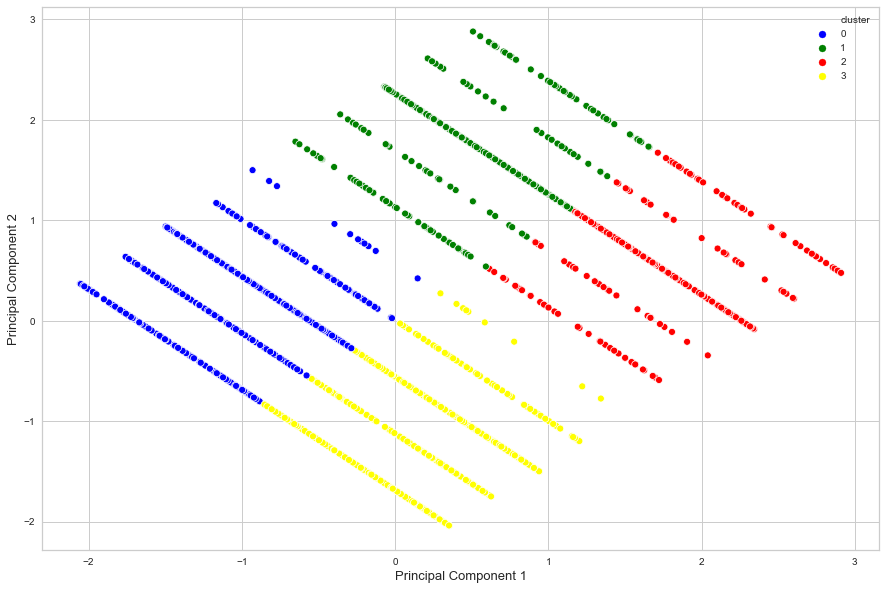

In [180]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=fin_df, palette=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Principal Component 1', fontsize=13)
plt.ylabel('Principal Component 2', fontsize=13)
plt.show()